In [105]:
import pandas as pd

# Load the data
file_path = 'Nashville_1.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Drop rows with missing target values
data = data.dropna(subset=['TotalValue'])

# Define features and target
X = data[['Bedrooms', 'Bathrooms', 'Acreage', 'City']]
y = data['TotalValue']

# Handle missing values and encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), ['Bedrooms', 'Bathrooms', 'Acreage']),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), ['City'])
    ])

X_processed = preprocessor.fit_transform(X)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

results_df = pd.DataFrame(results).T
results_df

,MSE,R2
Linear Regression,2.474869e+10,0.582957
Decision Tree,2.444640e+10,0.588051
Random Forest,1.900422e+10,0.679758


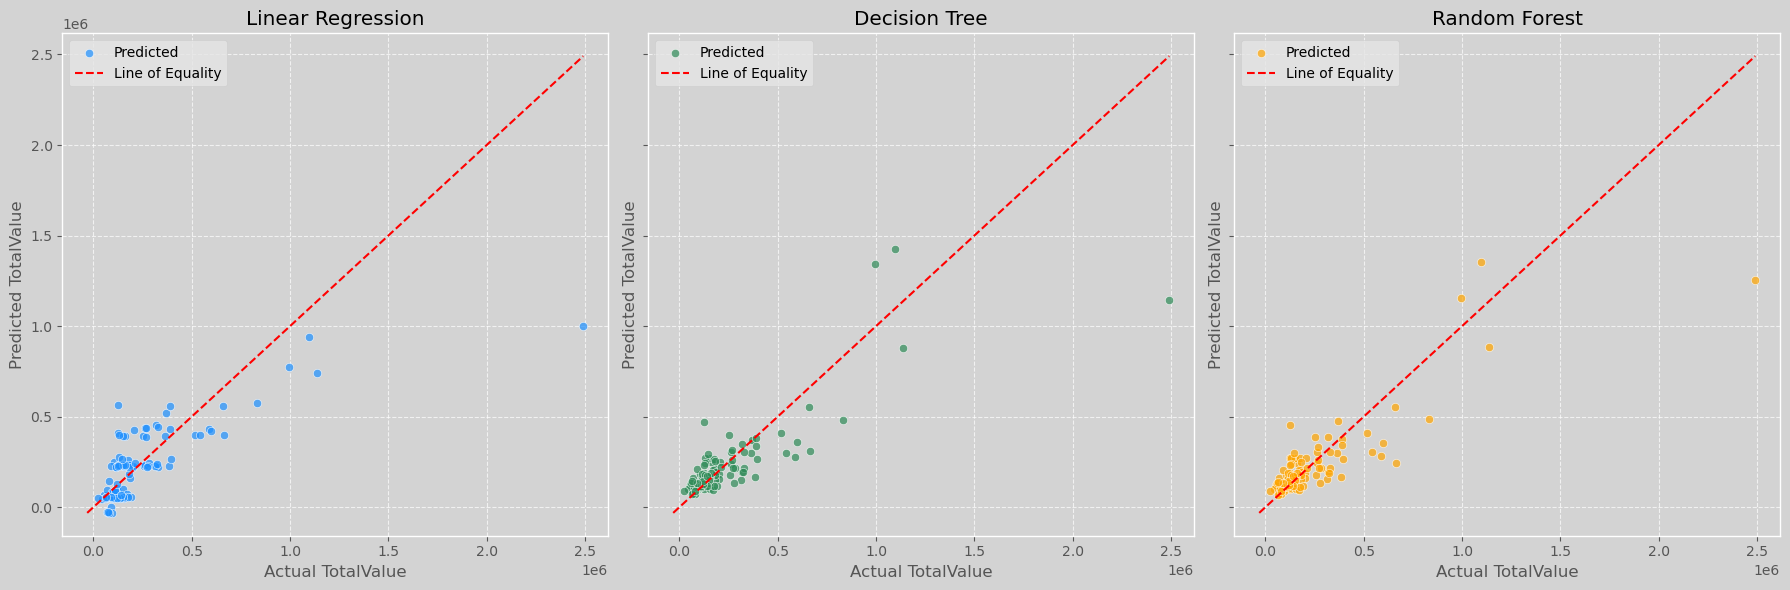

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions for each model
y_pred_lr = models['Linear Regression'].predict(X_test)
y_pred_dt = models['Decision Tree'].predict(X_test)
y_pred_rf = models['Random Forest'].predict(X_test)

# Sample 100 random points for each model
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), size=100, replace=False)

# Actual values and predictions for the sample points
y_actual_sample = y_test.iloc[sample_indices]
y_pred_lr_sample = y_pred_lr[sample_indices]
y_pred_dt_sample = y_pred_dt[sample_indices]
y_pred_rf_sample = y_pred_rf[sample_indices]

# Set up plot styles
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Define the line of equality
line = np.linspace(min(y_actual_sample.min(), y_pred_lr_sample.min()), 
                    max(y_actual_sample.max(), y_pred_lr_sample.max()), 100)

# Apply a gray background to the plots
fig.patch.set_facecolor('lightgray')
for ax in axes:
    ax.set_facecolor('lightgray')
    ax.grid(True, linestyle='--', alpha=0.7)

# Linear Regression
axes[0].scatter(y_actual_sample, y_pred_lr_sample, alpha=0.7, c='dodgerblue', edgecolors='w', label='Predicted')
axes[0].plot(line, line, color='red', linestyle='--', label='Line of Equality')
axes[0].set_title('Linear Regression')
axes[0].set_xlabel('Actual TotalValue')
axes[0].set_ylabel('Predicted TotalValue')
axes[0].legend()

# Decision Tree
axes[1].scatter(y_actual_sample, y_pred_dt_sample, alpha=0.7, c='seagreen', edgecolors='w', label='Predicted')
axes[1].plot(line, line, color='red', linestyle='--', label='Line of Equality')
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Actual TotalValue')
axes[1].set_ylabel('Predicted TotalValue')
axes[1].legend()

# Random Forest
axes[2].scatter(y_actual_sample, y_pred_rf_sample, alpha=0.7, c='orange', edgecolors='w', label='Predicted')
axes[2].plot(line, line, color='red', linestyle='--', label='Line of Equality')
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Actual TotalValue')
axes[2].set_ylabel('Predicted TotalValue')
axes[2].legend()

plt.tight_layout()
plt.show()
